# Importation des données

In [229]:
import pandas as pd
import missingno as msno
import scipy.stats as stats
from scipy.stats import zscore


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

In [231]:
df = pd.read_csv("dataset_assu.csv")

In [232]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [234]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [235]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [236]:
df[['sex','smoker']].value_counts()

sex     smoker
female  no        547
male    no        517
        yes       159
female  yes       115
Name: count, dtype: int64

- **Indice de masse corporel (BMI)** : Permet de donner un rapport entre la taille et le poids. Idéalement, il faut être entre 18.5 et 24.9.
- **Sexe (Sex)** : Genre de la personne qui contracte l’assurance (homme ou femme).
- **Âge (Age)** : Âge du principal bénéficiaire.
- **Nombre d’enfants à charge (Children)** : Nombre d’enfants couverts par l’assurance.
- **Fumeur (Smoker)** : Fumeur ou non-fumeur.
- **Région (Region)** : Zone résidentielle dans les États-Unis (Nord-Est, Sud-Est, Sud-Ouest, Nord-Ouest).
- **Charges (Charges)** : La prime d’assurance facturée (cible).

# Partie Analyse

1. **Vérifiez les informations manquantes et les doublons** (outil : `missingno`).
2. **Détection des valeurs aberrantes.**
3. **Analyse univariée :** Analysez chaque variable indépendamment.
4. **Corrélation des variables :** Étudiez les corrélations avec la variable cible.
5. **Analyse bivariée :** Exemple : interaction entre sexe et fumeur.
6. **Visualisations graphiques :**
    - Utilisez des box plots ou violin plots (outil : `seaborn`).
7. **Validation des hypothèses :** Utilisez des tests statistiques.
8. **Visualisations :** Appuyez chaque point par des graphiques pertinents.

## 1 | Vérification des doublons & informations manquantes


In [237]:
## Valeurs dupliquées / Doublons

df.duplicated().sum()

np.int64(1)

In [238]:
doublons = df[df.duplicated(keep=False)]
print(doublons)

""" Il y a en effet une ligne en doublon, nous allons dans ce cas la supprimer (peu importe 1ère(first) ou 2nd itération(last))"""

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


' Il y a en effet une ligne en doublon, nous allons dans ce cas la supprimer (peu importe 1ère(first) ou 2nd itération(last))'

In [239]:
df.drop_duplicates(inplace=True)

In [240]:
## Valeurs manquantes

df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

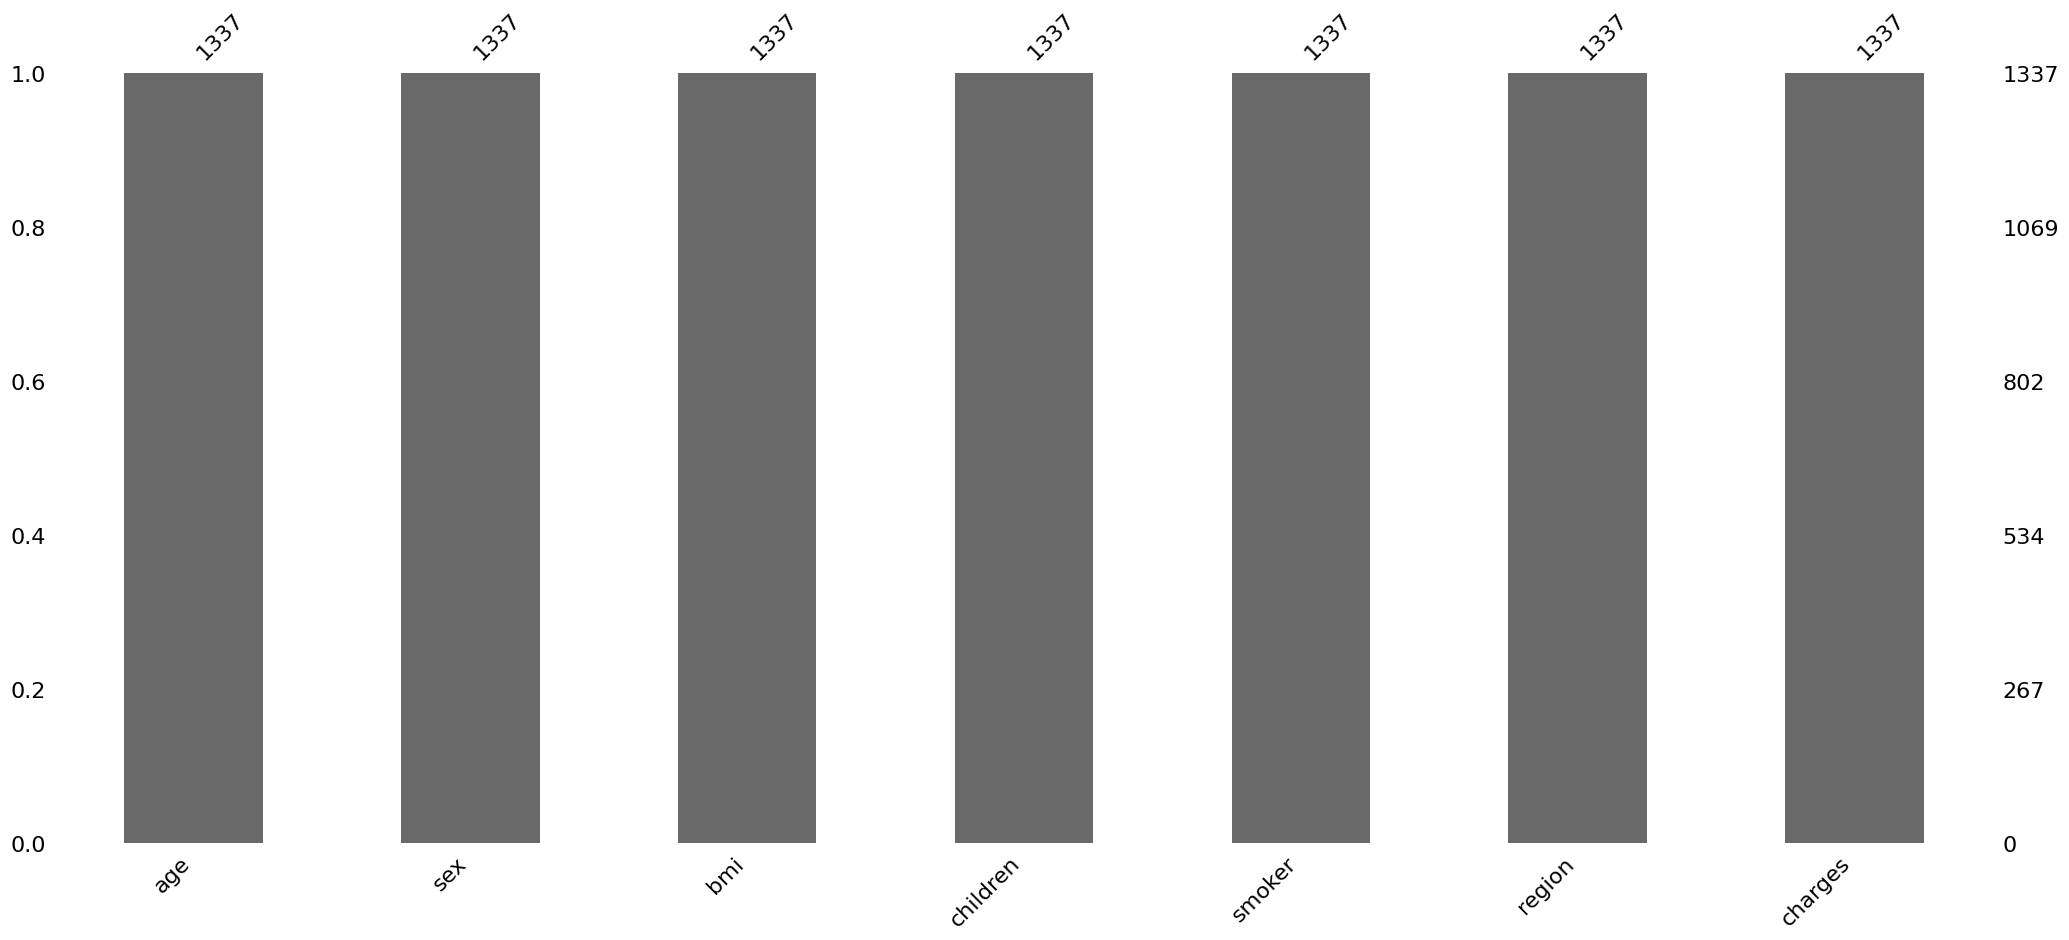

In [241]:
msno.bar(df)

## 2 | Valeurs abhérentes 

<Axes: xlabel='charges', ylabel='Count'>

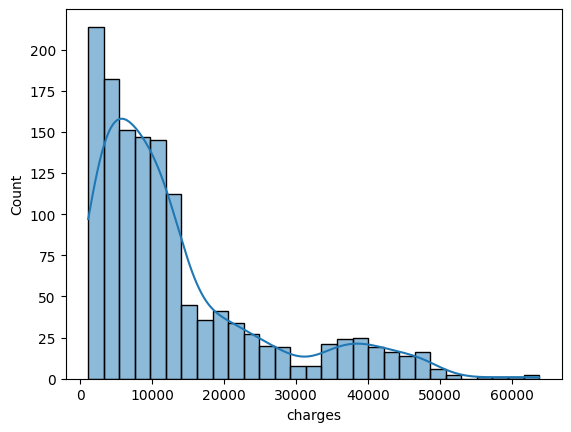

In [242]:
sns.histplot(df['charges'], kde=True)

<Axes: xlabel='charges'>

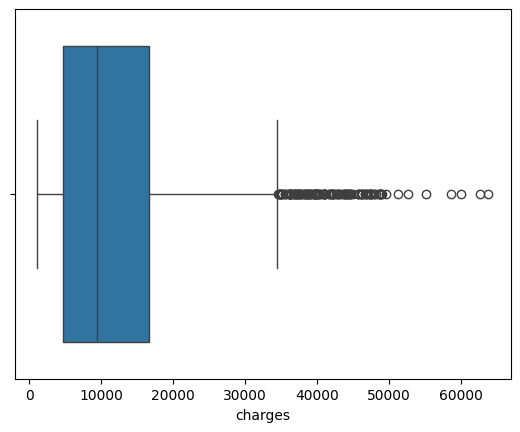

In [243]:
sns.boxplot(x=df["charges"])

<Axes: xlabel='age', ylabel='charges'>

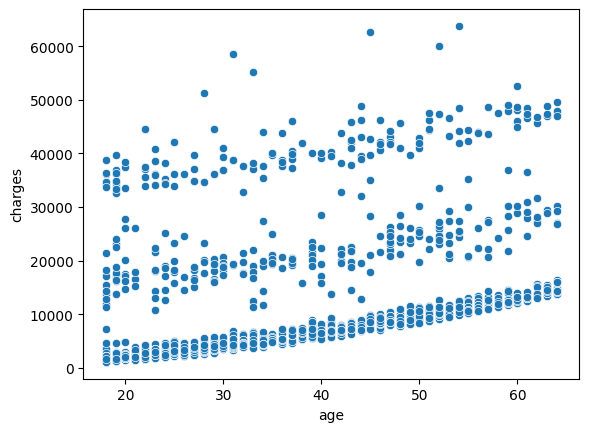

In [244]:
sns.scatterplot(x=df["age"], y=df["charges"])

In [245]:
## PAR ECART INTERQUARTILE (IQR)

""" Etant donné que nos données ne suivent pas une loi normale, on utilse l'IRQ pour déterminer les valeurs abhérentes"""

### Calculer les limites inférieure et supérieure
Q1 = df['charges'].quantile(0.25)  # Premier quartile
Q3 = df['charges'].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1                      # Intervalle interquartile

borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR

### Identification des valeurs aberrantes
charges_outliers = df[(df['charges'] < borne_inferieure) | (df['charges'] > borne_superieure)]
charges_outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [246]:
## L'âge doit être compris entre 18 à 120 ans et être un nombre entier

print(min(df["age"]))
print(max(df["age"]))
print(df["age"].dtype)
print()

"""Les données sur l'âge semblent correctes et n'ont pas l'air de contenir d'erreur"""

## Le BMI humain doit être compris entre 16 et 40
print(min(df["bmi"]))
print(max(df["bmi"]))
print()

"""Il n'existe pas de limites min ou max au BMI cependant un BMI infrieur à 16 est une 'insufficance pondérale sévère' et à plus de 40 c'est 'obésité de classe 3 (sévère)',
nous pourrions donc considérer que nos valeurs min et max ont l'air dans un premier temps d'être abhérentes"""

## Les enfants sont compris en général entre 0 à 5 et être un nombre entier
print(min(df["children"]))
print(max(df["children"]))
print(df["children"].dtype)
print()

"""Pour les données de la colonne 'children', il ne semble pas y avoir de valeurs abhérentes"""

"""Nous allons donc suite à ces observations regarder plus en détails le BMI"""


18
64
int64

15.96
53.13

0
5
int64



'Nous allons donc suite à ces observations regarder plus en détails le BMI'

<Axes: xlabel='bmi'>

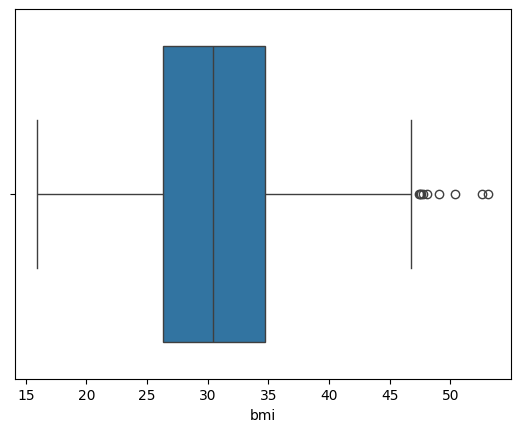

In [247]:
sns.boxplot(x=df['bmi'])

<Axes: xlabel='bmi', ylabel='Count'>

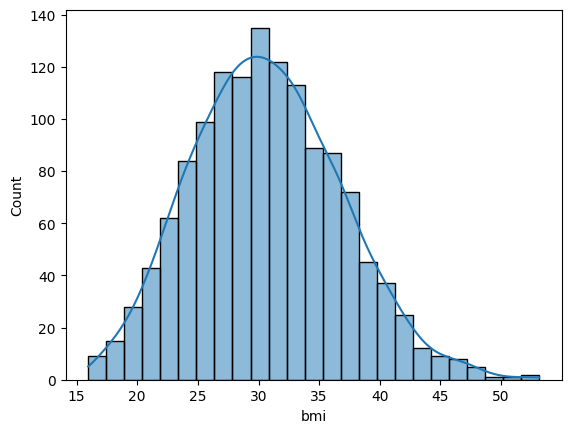

In [248]:
sns.histplot(x=df["bmi"], kde=True)

In [249]:
""" Nos données ont l'air de suivre approximativement une loi normale, on utilisera donc le Z-Score pour trouver les outliers possibles """


from scipy.stats import zscore

# Calcul des Z-scores
df['Z-score'] = zscore(df['bmi'])

# Filtrer les valeurs aberrantes
bmi_outliers = df[df['Z-score'].abs() > 3]
bmi_outliers


,age,sex,bmi,children,smoker,region,charges,Z-score
116,58,male,49.06,0,no,southeast,11381.3254,3.016724
847,23,male,50.38,1,no,southeast,2438.0552,3.233182
1047,22,male,52.58,1,yes,southeast,44501.3982,3.593945
1317,18,male,53.13,0,no,southeast,1163.4627,3.684136


In [250]:
Q1 = df['bmi'].quantile(0.25)  # Premier quartile
Q3 = df['bmi'].quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1                  # Intervalle interquartile

borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR

### Identification des valeurs aberrantes
bmi_outliers = df[(df['bmi'] < borne_inferieure) | (df['bmi'] > borne_superieure)]
bmi_outliers.sort_values('bmi')

,age,sex,bmi,children,smoker,region,charges,Z-score
543,54,female,47.41,0,yes,southeast,63770.42801,2.746152
401,47,male,47.52,1,no,southeast,8083.91980,2.764190
860,37,female,47.60,2,yes,southwest,46113.51100,2.777309
1088,52,male,47.74,1,no,southeast,9748.91060,2.800267
286,46,female,48.07,2,no,northeast,9432.92530,2.854381
116,58,male,49.06,0,no,southeast,11381.32540,3.016724
847,23,male,50.38,1,no,southeast,2438.05520,3.233182
1047,22,male,52.58,1,yes,southeast,44501.39820,3.593945
1317,18,male,53.13,0,no,southeast,1163.46270,3.684136


In [251]:
df[df['bmi'] < 16]

,age,sex,bmi,children,smoker,region,charges,Z-score
172,18,male,15.96,0,no,northeast,1694.7964,-2.411119


In [252]:
df[df['bmi'] > 40]

,age,sex,bmi,children,smoker,region,charges,Z-score
14,27,male,42.13,0,yes,southeast,39611.7577,1.880321
18,56,male,40.30,0,no,southwest,10602.3850,1.580232
83,48,female,41.23,4,no,northwest,11033.6617,1.732736
116,58,male,49.06,0,no,southeast,11381.3254,3.016724
170,63,male,41.47,0,no,southeast,13405.3903,1.772092
...,...,...,...,...,...,...,...,...
1240,52,male,41.80,2,yes,southeast,47269.8540,1.826207
1312,34,male,42.90,1,no,southwest,4536.2590,2.006588
1317,18,male,53.13,0,no,southeast,1163.4627,3.684136
1323,42,female,40.37,2,yes,southeast,43896.3763,1.591711


## 3 | Analyse univariée

In [253]:
summary_stats = df.describe().transpose()
summary_stats['median'] = df.select_dtypes('number').median()


summary_stats

,count,mean,std,min,25%,50%,75%,max,median
age,1337.0,3.922214e+01,14.044333,18.000000,27.000000,39.000000,51.000000,64.000000,39.000000
bmi,1337.0,3.066345e+01,6.100468,15.960000,26.290000,30.400000,34.700000,53.130000,30.400000
children,1337.0,1.095737e+00,1.205571,0.000000,0.000000,1.000000,2.000000,5.000000,1.000000
charges,1337.0,1.327912e+04,12110.359656,1121.873900,4746.344000,9386.161300,16657.717450,63770.428010,9386.161300
Z-score,1337.0,-2.285216e-16,1.000374,-2.411119,-0.717173,-0.043202,0.661926,3.684136,-0.043202


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
 7   Z-score   1337 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 94.0+ KB


<Axes: xlabel='charges', ylabel='Count'>

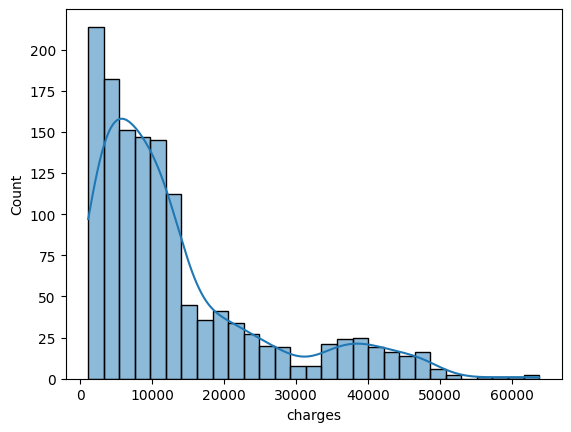

In [255]:
sns.histplot(df['charges'], kde=True)

In [256]:
print(df['region'].value_counts(normalize=True))
print()
print(df['region'].value_counts())

region
southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: proportion, dtype: float64

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


In [257]:
pd.crosstab(df['region'], df['sex'])

sex,female,male
region,,
northeast,161,163
northwest,164,160
southeast,175,189
southwest,162,163


In [258]:
print(df['sex'].value_counts(normalize=True))
print()
print(df['sex'].value_counts())

sex
male      0.504862
female    0.495138
Name: proportion, dtype: float64

sex
male      675
female    662
Name: count, dtype: int64


In [259]:
print(df['children'].value_counts(normalize=True))
print()
print(df['children'].value_counts())

children
0    0.428571
1    0.242334
2    0.179506
3    0.117427
4    0.018699
5    0.013463
Name: proportion, dtype: float64

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [260]:
print(df['smoker'].value_counts(normalize=True))
print()
print(df['smoker'].value_counts())
print()
print(df[['smoker', 'sex']].value_counts(normalize=True))
print()
print(df[['smoker', 'sex']].value_counts())

smoker
no     0.795064
yes    0.204936
Name: proportion, dtype: float64

smoker
no     1063
yes     274
Name: count, dtype: int64

smoker  sex   
no      female    0.409125
        male      0.385939
yes     male      0.118923
        female    0.086013
Name: proportion, dtype: float64

smoker  sex   
no      female    547
        male      516
yes     male      159
        female    115
Name: count, dtype: int64


<Axes: xlabel='charges'>

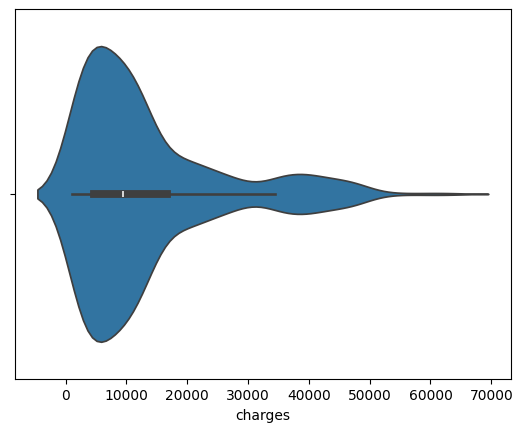

In [261]:
sns.violinplot(x='charges', data=df)

## 4. Analyse Bivariée

In [262]:
df.drop(columns='Z-score', inplace=True)

In [263]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_encoded = df

df_encoded['sex_encoded'] = encoder.fit_transform(df_encoded['sex'])
df_encoded['region_encoded'] = encoder.fit_transform(df_encoded['region'])
df_encoded['smoker_encoded'] =  encoder.fit_transform(df_encoded['smoker'])

In [264]:
df_encoded = df_encoded[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded', 'charges']]
df_encoded

,age,sex_encoded,bmi,children,smoker_encoded,region_encoded,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [265]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_encoded', 'region_encoded', 'smoker_encoded'],
      dtype='object')

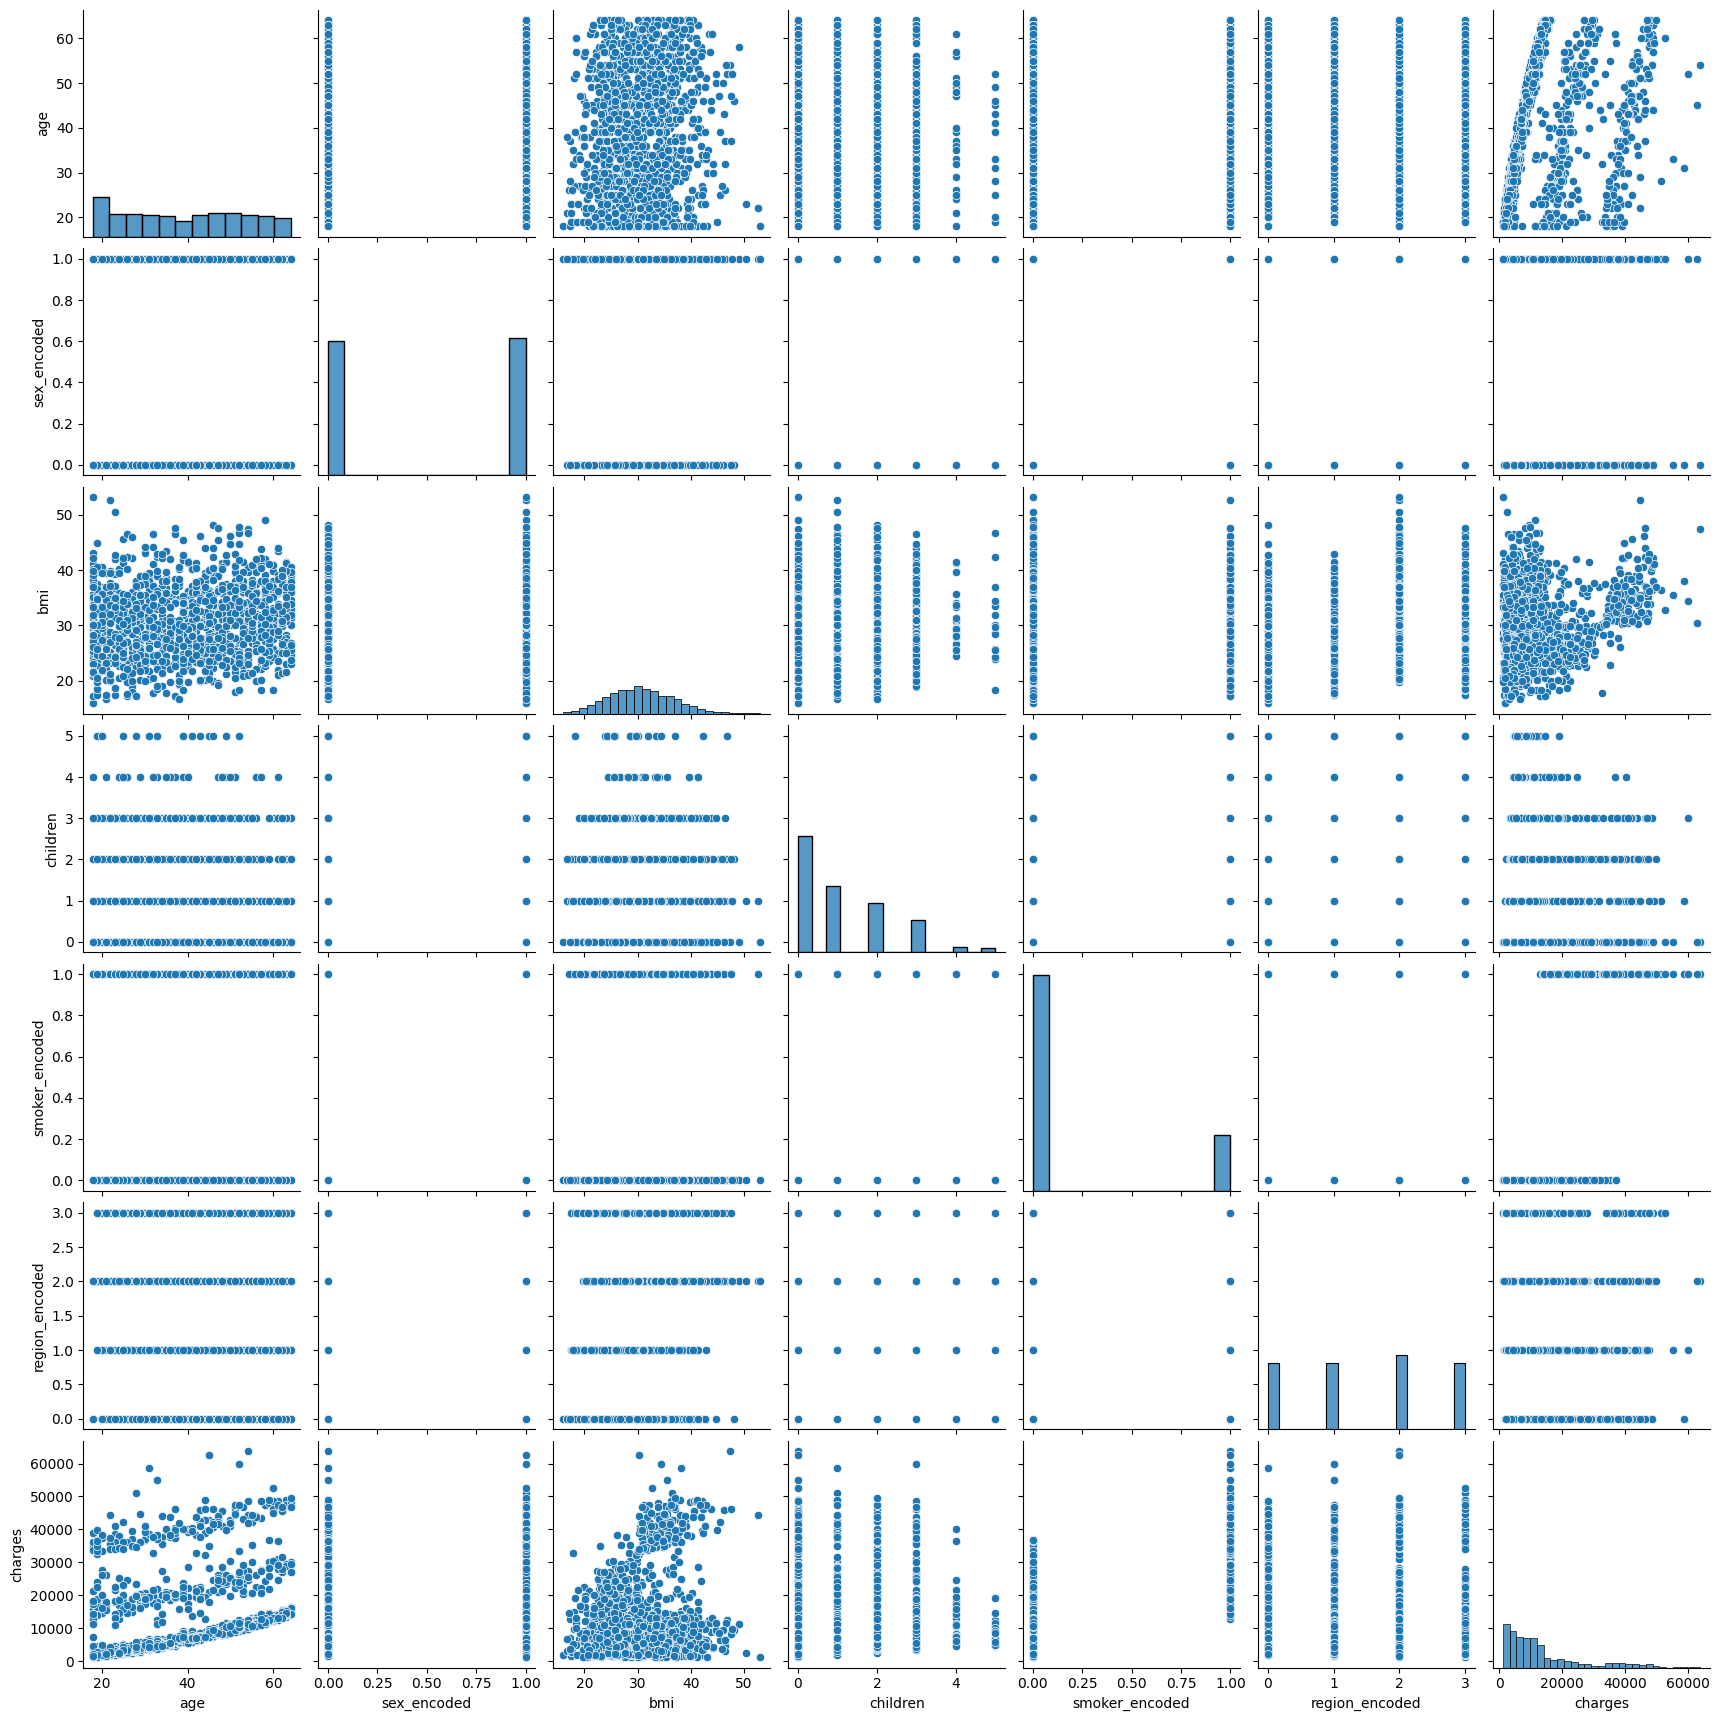

In [266]:
sns.pairplot(df_encoded)

## 5 | Corrélations

<Axes: >

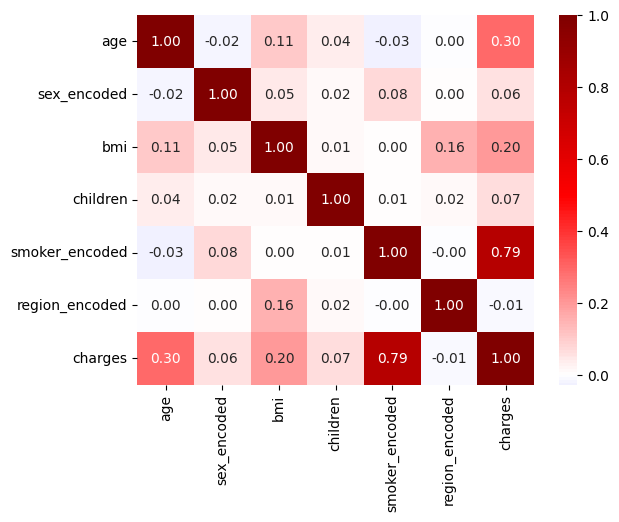

In [267]:
sns.heatmap(df_encoded.select_dtypes('number').corr(), annot = True, fmt='.2f', cmap='seismic', center=0)

In [268]:
df_encoded

,age,sex_encoded,bmi,children,smoker_encoded,region_encoded,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [269]:
df_encoded_bis = pd.get_dummies(df[['age', 'sex_encoded', 'bmi', 'region', 'smoker_encoded', 'charges']], columns=['region'], drop_first=True, dtype=int)

df_encoded_bis

,age,sex_encoded,bmi,smoker_encoded,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,1,16884.92400,0,0,1
1,18,1,33.770,0,1725.55230,0,1,0
2,28,1,33.000,0,4449.46200,0,1,0
3,33,1,22.705,0,21984.47061,1,0,0
4,32,1,28.880,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,0,10600.54830,1,0,0
1334,18,0,31.920,0,2205.98080,0,0,0
1335,18,0,36.850,0,1629.83350,0,1,0
1336,21,0,25.800,0,2007.94500,0,0,1


## 6 | Tests

In [270]:
import scipy.stats as stats
import pandas as pd

# Sélection des variables qualitatives
qualitative_columns = df.select_dtypes(include=['object', 'category']).columns

# Test du Chi-carré pour toutes les paires de variables qualitatives
for col1 in qualitative_columns:
    for col2 in qualitative_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
            
            print(f"Chi-carré pour {col1} vs {col2}")
            print(f"Statistique Chi-carré: {chi2_stat}")
            print(f"P-valeur: {p_val}")
            
            # Vérification de l'hypothèse
            if p_val < 0.05:
                print(f"Il y a une relation significative entre {col1} et {col2}")
            else:
                print(f"Aucune relation significative entre {col1} et {col2}")
            print("-" * 50)


Chi-carré pour sex vs smoker
Statistique Chi-carré: 7.469139330086637
P-valeur: 0.0062765550120107375
Il y a une relation significative entre sex et smoker
--------------------------------------------------
Chi-carré pour sex vs region
Statistique Chi-carré: 0.476909551071918
P-valeur: 0.9239341965125791
Aucune relation significative entre sex et region
--------------------------------------------------
Chi-carré pour smoker vs sex
Statistique Chi-carré: 7.469139330086637
P-valeur: 0.0062765550120107375
Il y a une relation significative entre smoker et sex
--------------------------------------------------
Chi-carré pour smoker vs region
Statistique Chi-carré: 7.277902541321909
P-valeur: 0.06354826573182332
Aucune relation significative entre smoker et region
--------------------------------------------------
Chi-carré pour region vs sex
Statistique Chi-carré: 0.476909551071918
P-valeur: 0.9239341965125791
Aucune relation significative entre region et sex
------------------------------

In [271]:
# Calcul de la corrélation entre toutes les variables quantitatives


for col1 in df[['age', 'bmi', 'children', 'charges']]:
    for col2 in df[['age', 'bmi', 'children', 'charges']]:
        if col1 != col2:
            pearson_corr, p_val = stats.pearsonr(df[col1], df[col2])
            
            print(f"Corrélation de Pearson entre {col1} et {col2}")
            print(f"Coefficient de corrélation: {pearson_corr}")
            print(f"P-valeur: {p_val}")
            
            # Vérification de l'hypothèse
            if p_val < 0.05:
                print(f"Il y a une corrélation significative entre {col1} et {col2}")
            else:
                print(f"Aucune corrélation significative entre {col1} et {col2}")
            print("-" * 50)


Corrélation de Pearson entre age et bmi
Coefficient de corrélation: 0.10934361041896885
P-valeur: 6.164372237148674e-05
Il y a une corrélation significative entre age et bmi
--------------------------------------------------
Corrélation de Pearson entre age et children
Coefficient de corrélation: 0.041536210016366246
P-valeur: 0.12901275682640062
Aucune corrélation significative entre age et children
--------------------------------------------------
Corrélation de Pearson entre age et charges
Coefficient de corrélation: 0.2983082125097864
P-valeur: 6.975748762691051e-29
Il y a une corrélation significative entre age et charges
--------------------------------------------------
Corrélation de Pearson entre bmi et age
Coefficient de corrélation: 0.10934361041896884
P-valeur: 6.164372237148674e-05
Il y a une corrélation significative entre bmi et age
--------------------------------------------------
Corrélation de Pearson entre bmi et children
Coefficient de corrélation: 0.0127546575133

In [272]:
# Sélection des variables quantitatives
quantitative_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Test t de Student entre toutes les variables quantitatives et les groupes
for col in quantitative_columns:
    for group in df['sex'].unique():
        group_data = df[df['sex'] == group][col]
        other_data = df[df['sex'] != group][col]
        
        t_stat, p_val = stats.ttest_ind(group_data, other_data)
        
        print(f"Test t de Student pour {col} et {group}")
        print(f"Statistique t: {t_stat}")
        print(f"P-valeur: {p_val}")
        
        # Vérification de l'hypothèse
        if p_val < 0.05:
            print(f"Les moyennes de {col} sont significativement différentes pour {group}")
        else:
            print(f"Aucune différence significative pour {col} entre {group}")
        print("-" * 50)


Test t de Student pour age et female
Statistique t: 0.7240829571299973
P-valeur: 0.46914167254387895
Aucune différence significative pour age entre female
--------------------------------------------------
Test t de Student pour age et male
Statistique t: -0.7240829571299973
P-valeur: 0.46914167254387895
Aucune différence significative pour age entre male
--------------------------------------------------
Test t de Student pour bmi et female
Statistique t: -1.6970672301298684
P-valeur: 0.08991704324931137
Aucune différence significative pour bmi entre female
--------------------------------------------------
Test t de Student pour bmi et male
Statistique t: 1.6970672301298684
P-valeur: 0.08991704324931137
Aucune différence significative pour bmi entre male
--------------------------------------------------
Test t de Student pour children et female
Statistique t: -0.6522111483835418
P-valeur: 0.5143772455650546
Aucune différence significative pour children entre female
-----------------

/home/utilisateur/Documents/Projets/Regression/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [273]:
# Sélection des variables quantitatives
quantitative_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Test t de Student entre toutes les vsexariables quantitatives et les groupes
for col in quantitative_columns:
    for group in df['smoker'].unique():
        group_data = df[df['smoker'] == group][col]
        other_data = df[df['smoker'] != group][col]
        
        t_stat, p_val = stats.ttest_ind(group_data, other_data)
        
        print(f"Test t de Student pour {col} et {group}")
        print(f"Statistique t: {t_stat}")
        print(f"P-valeur: {p_val}")
        
        # Vérification de l'hypothèse
        if p_val < 0.05:
            print(f"Les moyennes de {col} sont significativement différentes pour {group}")
        else:
            print(f"Aucune différence significative pour {col} entre {group}")
        print("-" * 50)

Test t de Student pour age et yes
Statistique t: -0.9351993817528746
P-valeur: 0.3498546857007494
Aucune différence significative pour age entre yes
--------------------------------------------------
Test t de Student pour age et no
Statistique t: 0.9351993817528746
P-valeur: 0.3498546857007494
Aucune différence significative pour age entre no
--------------------------------------------------
Test t de Student pour bmi et yes
Statistique t: 0.13687893088832626
P-valeur: 0.8911471317222854
Aucune différence significative pour bmi entre yes
--------------------------------------------------
Test t de Student pour bmi et no
Statistique t: -0.13687893088832626
P-valeur: 0.8911471317222854
Aucune différence significative pour bmi entre no
--------------------------------------------------
Test t de Student pour children et yes
Statistique t: 0.267872851014335
P-valeur: 0.7888385727704449
Aucune différence significative pour children entre yes
-----------------------------------------------

/home/utilisateur/Documents/Projets/Regression/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
